# Tugas 2 | FFT (Fast Fourier Transform)

Nama: Ronggo Widjoyo<br>
NIM: 220411100061<br>
Kelas: PCD A

## Import Tools

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## Load Image

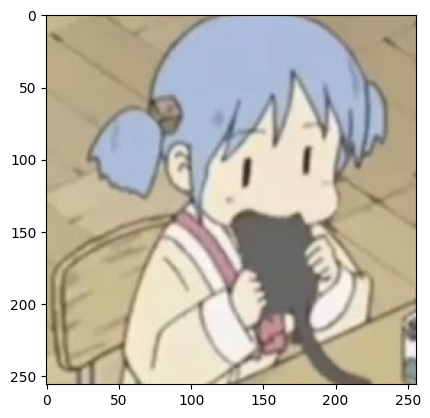

In [14]:
img = cv.imread('test_cropped.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

## Convert Image

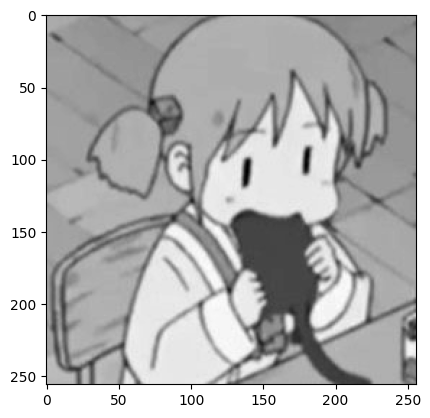

In [17]:
grey_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
plt.imshow(grey_img, cmap='gray')
plt.show()

## Fast Fourier Transform

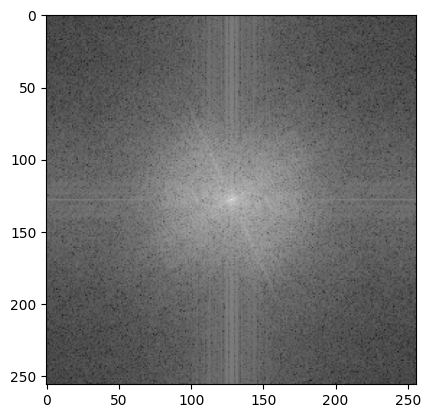

In [22]:
grey_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)
grey_img_fourier = np.fft.fftshift(np.fft.fft2(grey_img))
plt.imshow(np.log(abs(grey_img_fourier)), cmap='grey')
plt.show()

## Fast Fourier Transform vertikal menggunakan gambar greyscale

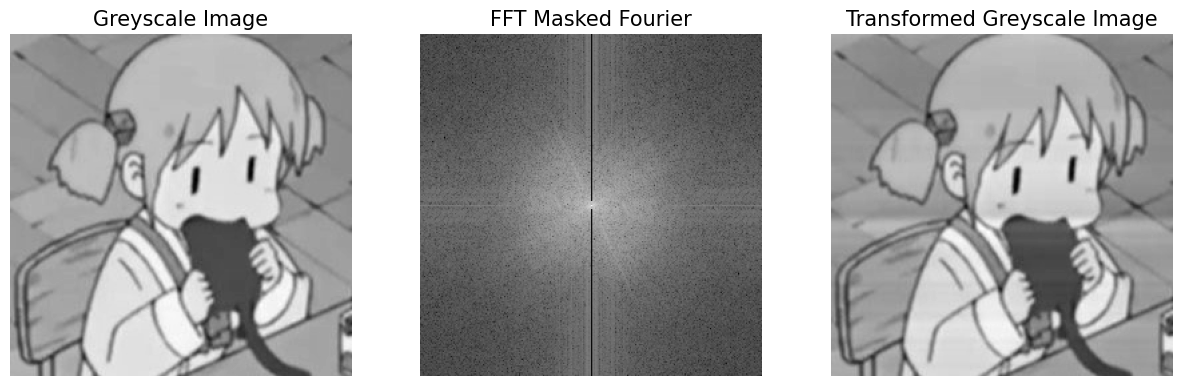

In [79]:
img = cv.imread('test_cropped.jpg', 1)
grey_img = cv.cvtColor(img, cv.COLOR_RGB2GRAY)

def fourier_masker_ver(image, i):
	f_size = 15
	grey_img_fourier = np.fft.fftshift(np.fft.fft2(image))
	
	grey_img_fourier[:125, image.shape[1]//2] = i
	grey_img_fourier[-125:, image.shape[1]//2] = i

	fig, ax = plt.subplots(1,3, figsize=(15,15))
	ax[0].imshow(image, cmap = 'gray')
	ax[0].set_title('Greyscale Image', fontsize = f_size)
	ax[0].set_axis_off()

	ax[1].imshow(np.log(abs(grey_img_fourier)), cmap='gray')
	ax[1].set_title('FFT Masked Fourier', fontsize = f_size)
	ax[1].set_axis_off()

	ax[2].imshow(abs(np.fft.ifft2(grey_img_fourier)), cmap='gray')
	ax[2].set_title('Transformed Greyscale Image', fontsize = f_size)
	ax[2].set_axis_off()

fourier_masker_ver(grey_img, 1)

## Fast Fourier Transform vertikal menggunakan gambar RGB

True

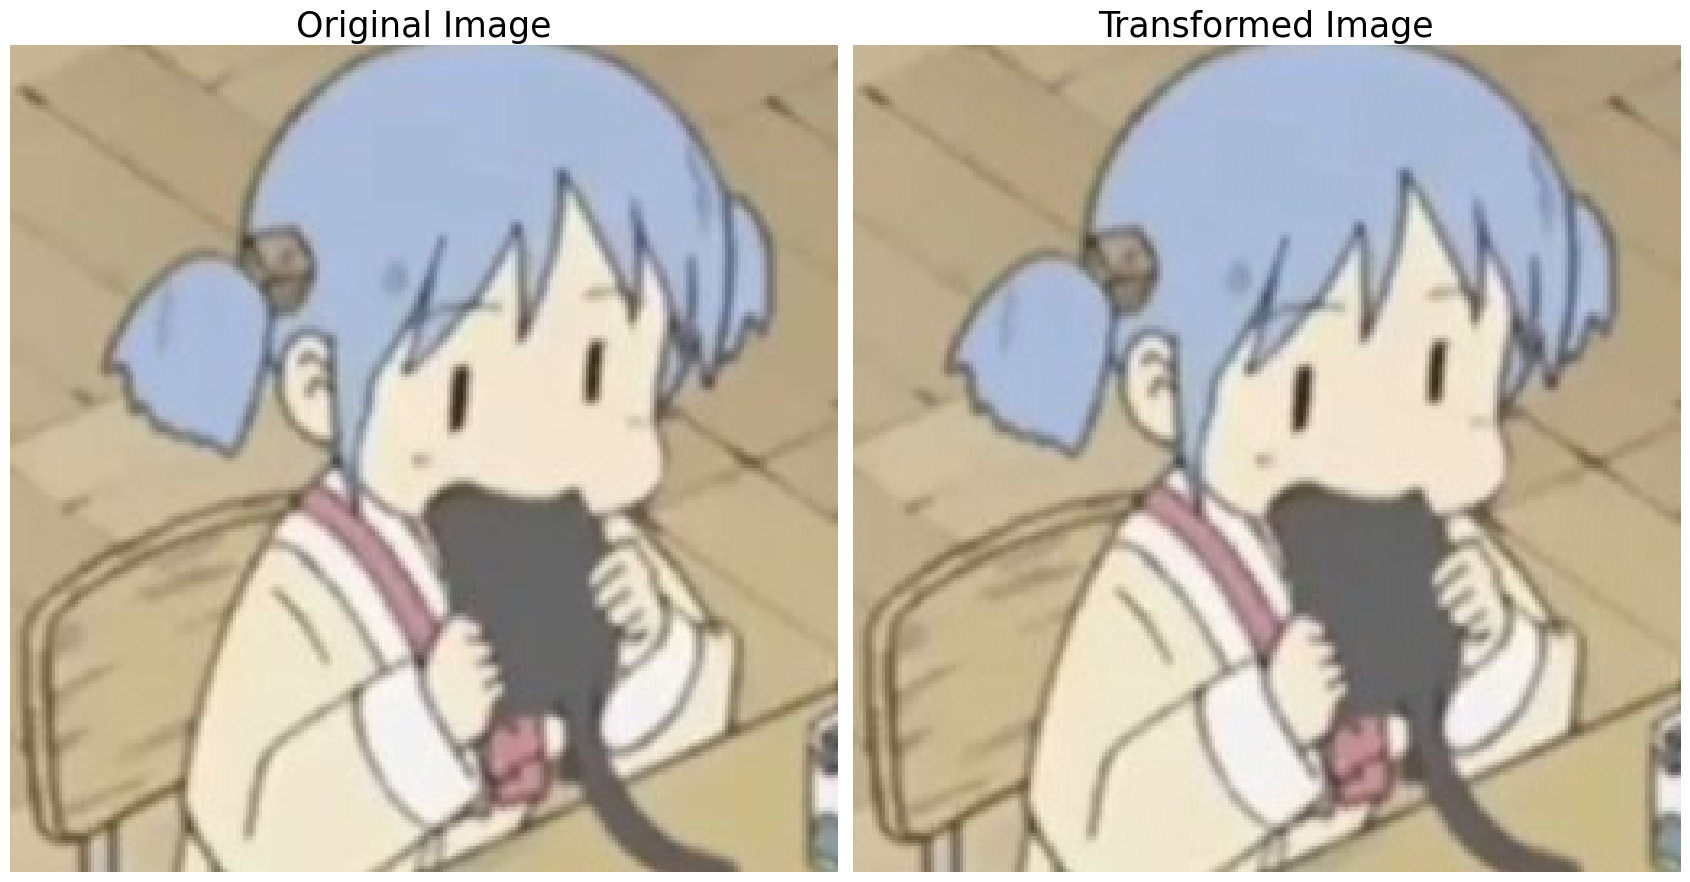

In [22]:
def fourier_transform_rgb(image):
    f_size = 25
    transformed_channels = []
    for i in range(3):
        rgb_fft = np.fft.fftshift(np.fft.fft2((image[:, :, i])))
        rgb_fft[:125, 235:237] = 1
        rgb_fft[-125:,235:237] = 1
        transformed_channels.append(abs(np.fft.ifft2(rgb_fft)))
    
    final_image = np.dstack([transformed_channels[0].astype(int), 
                             transformed_channels[1].astype(int), 
                             transformed_channels[2].astype(int)])
    
    fig, ax = plt.subplots(1, 2, figsize=(17,12))
    ax[0].imshow(image)
    ax[0].set_title('Original Image', fontsize = f_size)
    ax[0].set_axis_off()
    
    ax[1].imshow(final_image)
    ax[1].set_title('Transformed Image', fontsize = f_size)
    ax[1].set_axis_off()
    
    fig.tight_layout()
    return final_image
    
img = cv.imread('test_cropped.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_new = fourier_transform_rgb(img)
img_new_uint8 = img_new.astype(np.uint8)
cv.imwrite('transformed_image.jpg', cv.cvtColor(img_new_uint8, cv.COLOR_BGR2RGB))
